# Exploratory Data Analysis - Retail

#### Created on wed 09/05/2020
##### Author: Kiran Shinkar
##### Email - ki201shinkar@gmail.com
##### WhatsApps - +91-9689678025
##### LinkedIn - https://www.linkedin.com/in/kiran-shinkar-53960515b/

In [1]:
# libraries required
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\91968\Downloads\spark found\SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data['Postal Code'] = data['Postal Code'].astype('object')

In [8]:
# Visualization

<AxesSubplot:>

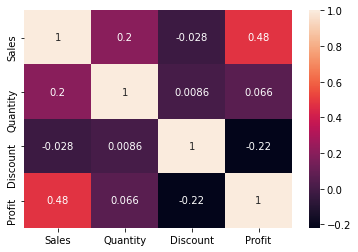

In [9]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [10]:
data = data.drop(['Postal Code'],axis = 1)

In [11]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

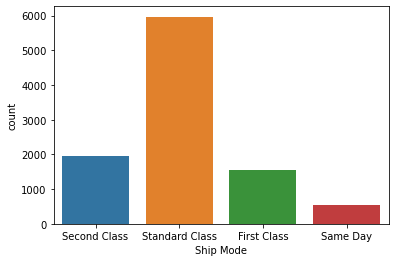

In [12]:
sns.countplot(x=data['Ship Mode'])

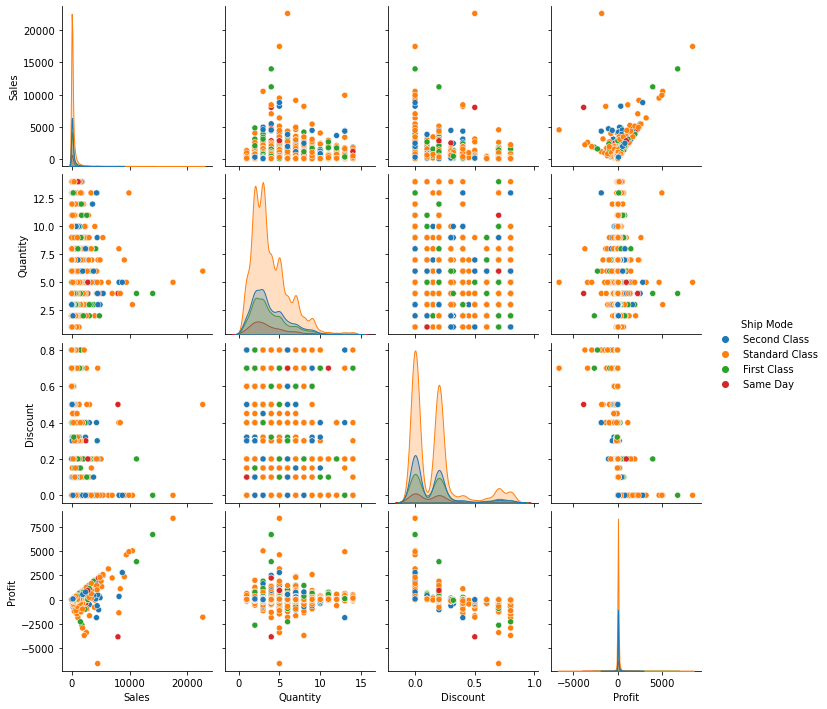

In [13]:
sns.pairplot(data, hue = 'Ship Mode')

In [14]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

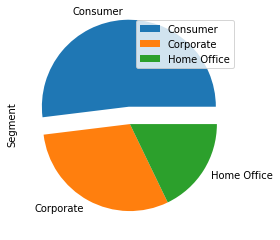

In [15]:
data['Segment'].value_counts().plot.pie(explode = [0.2, 0, 0]) 
plt.legend()
plt.show()

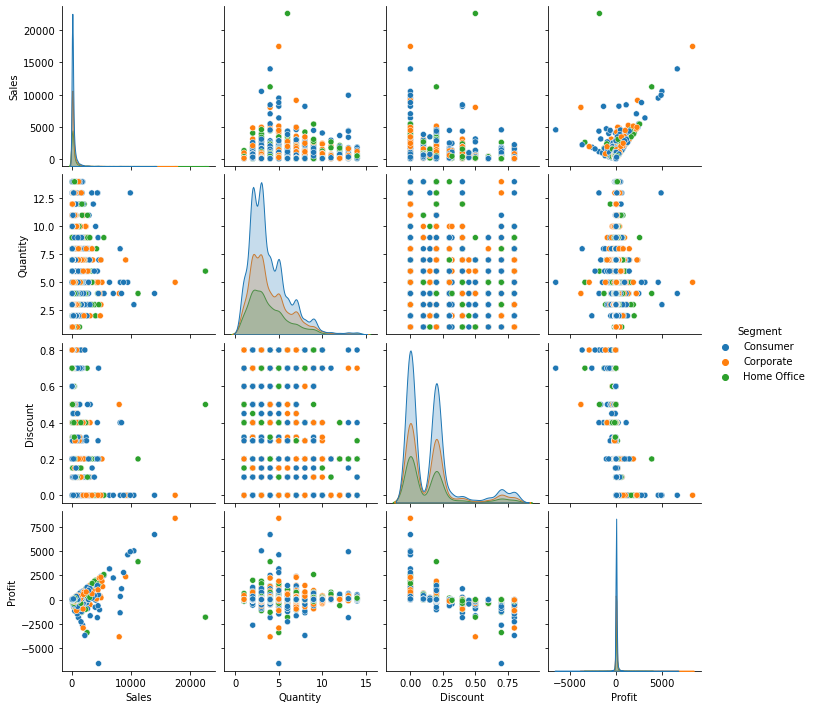

In [16]:
sns.pairplot(data, hue = 'Segment')

<AxesSubplot:xlabel='Segment', ylabel='count'>

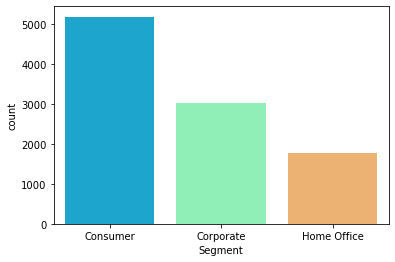

In [17]:
sns.countplot(x = 'Segment',data = data, palette = 'rainbow')

In [18]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

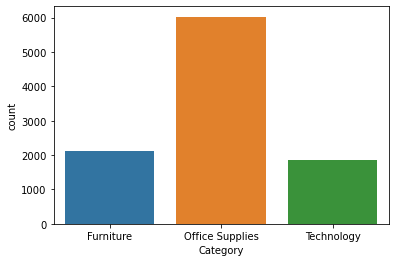

In [19]:
sns.countplot(x='Category',data=data,palette='tab10')

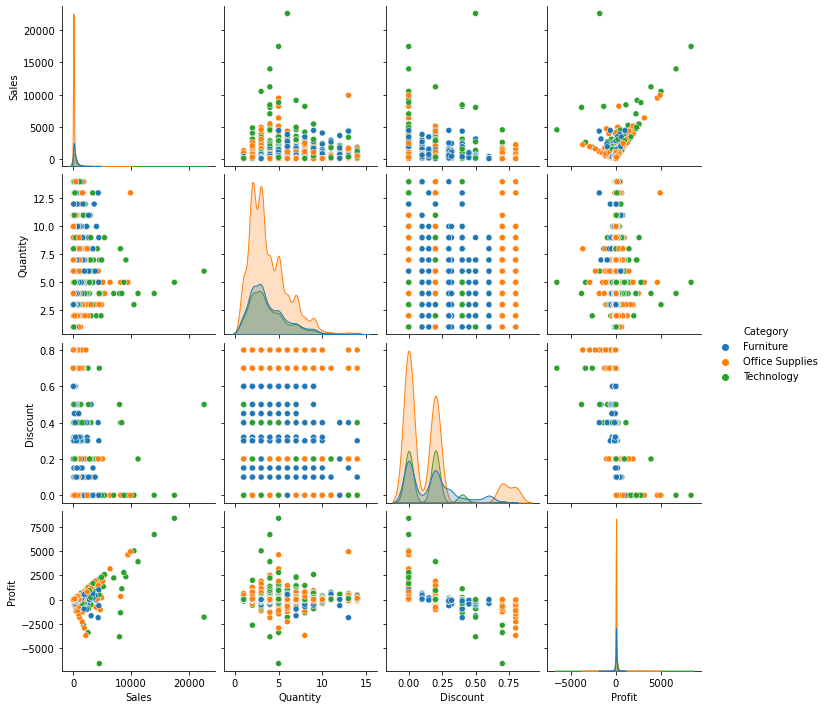

In [20]:
sns.pairplot(data,hue='Category')

In [21]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

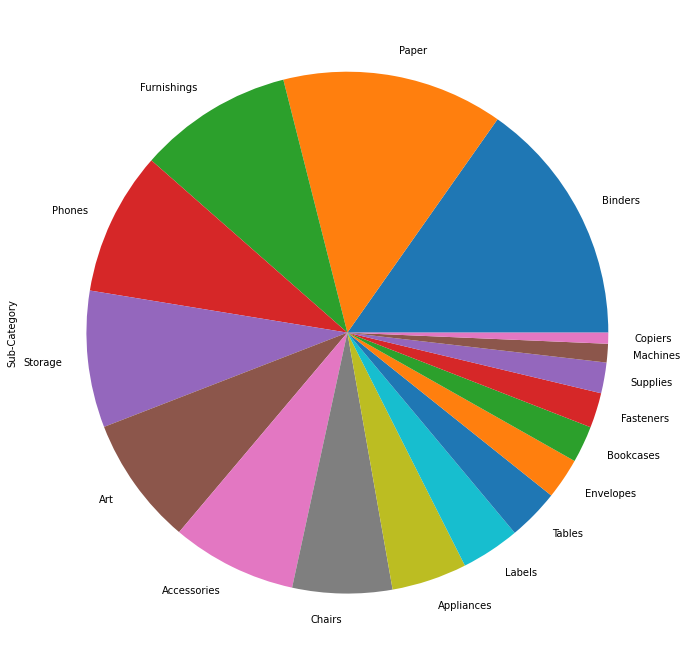

In [22]:
plt.figure(figsize=(15,12))
data['Sub-Category'].value_counts().plot.pie()
plt.show()

### Observation 1
Maximum are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers

In [23]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

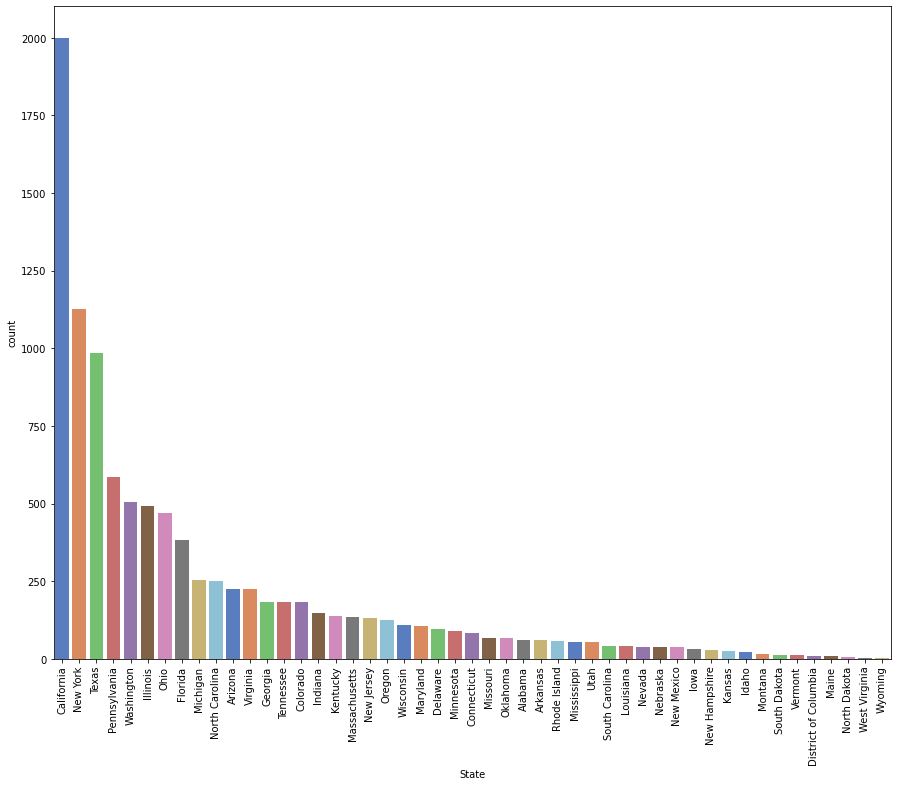

In [24]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='muted',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Observation 2
Highest number of buyers are from California and New York

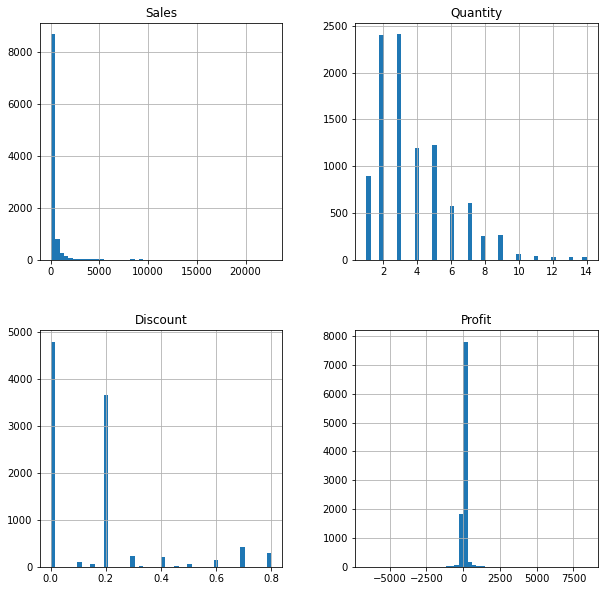

In [25]:
data.hist(figsize=(10,10),bins=50)
plt.show()

### Observation 3
Most customers tends to buy quantity of 2 and 3
Discount give maximum is 0 to 20 percent

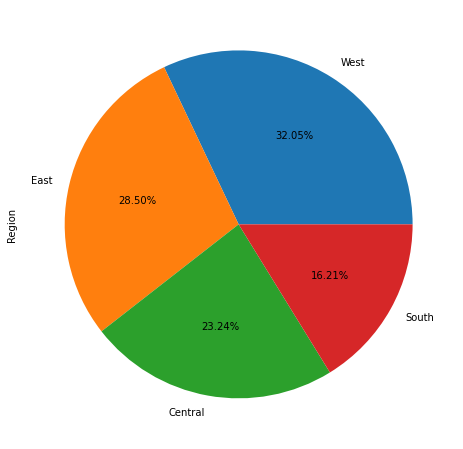

In [26]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.show()

### Profit vs Discount

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

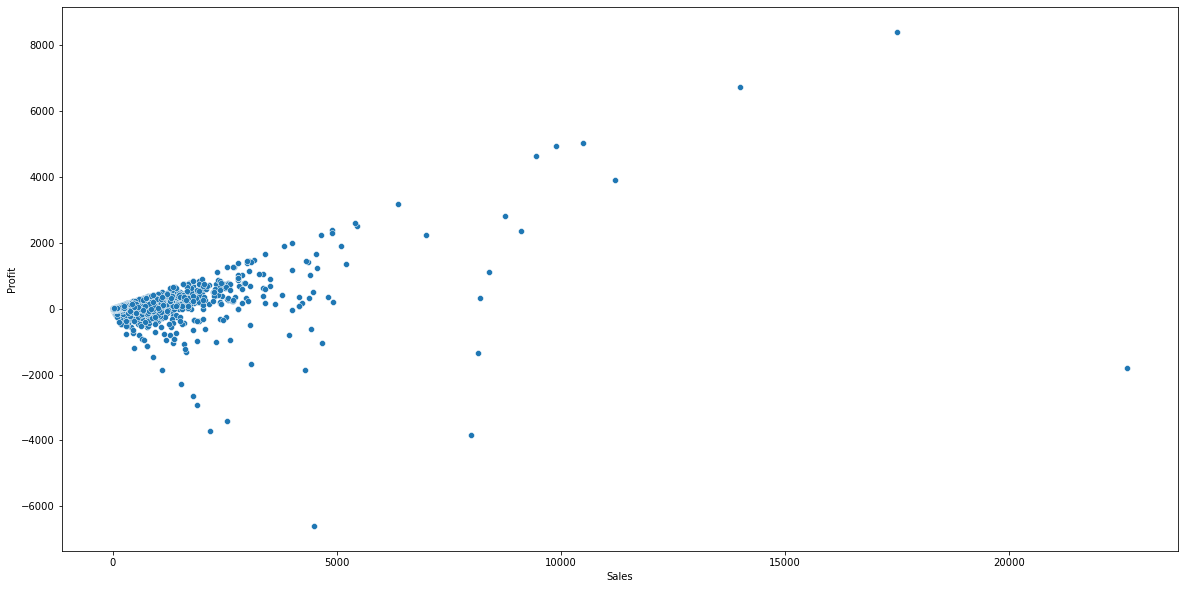

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Sales',y='Profit', data = data)

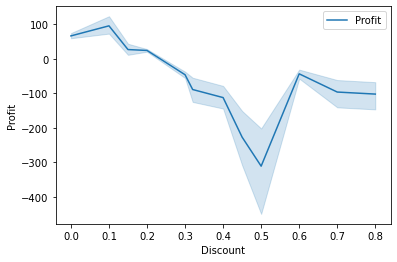

In [28]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

#### Observation 4
#### No correlation between profit and discount

### Profit vs Quantity

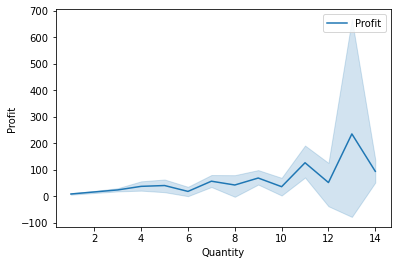

In [29]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

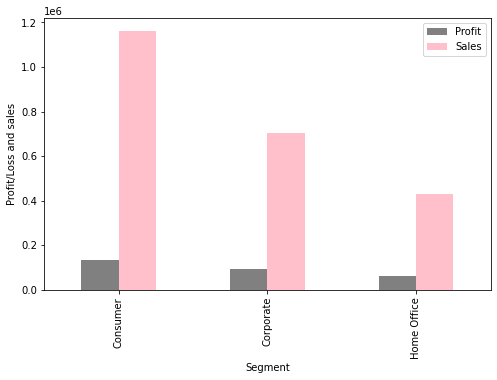

In [41]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['grey','pink'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

#### Observation 5
Profit and sales are maximum in consumer segment and minimum in Home Office segment

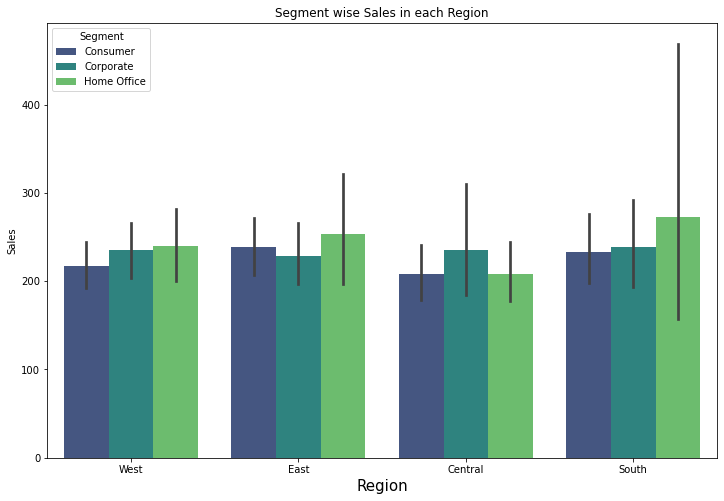

In [31]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='viridis')
plt.xlabel('Region',fontsize=15)
plt.show()

#### Observation 6
#### Segment wise sales are almost same in every region

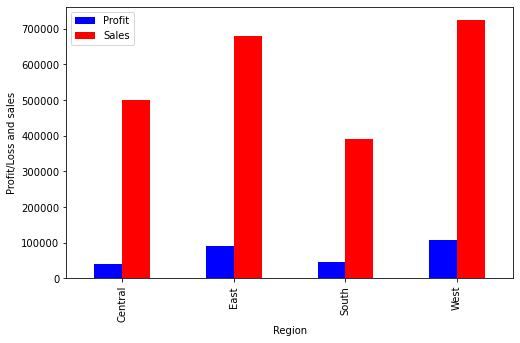

In [32]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

#### Observation 7
#### Profit and sales are maximum in west region and minimum in south region

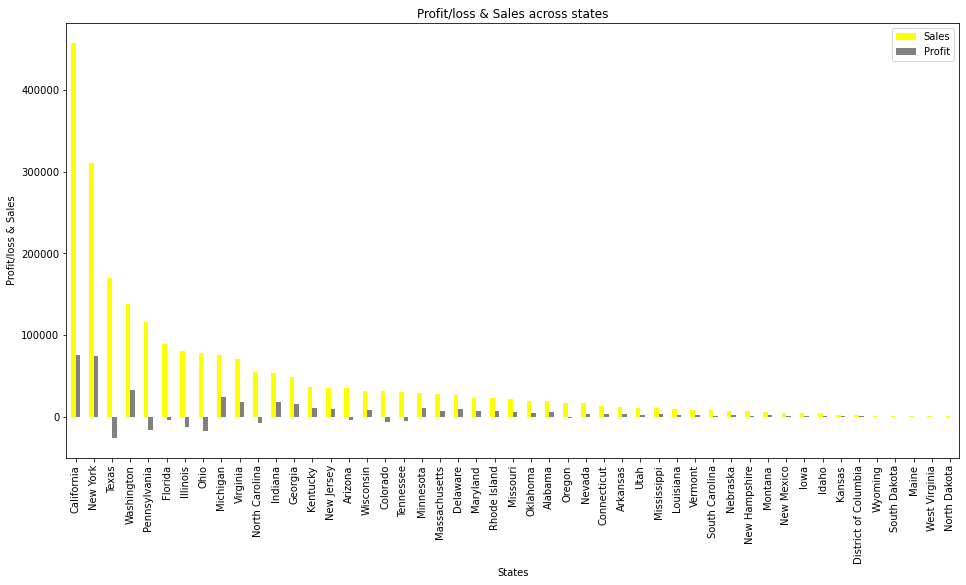

In [37]:
ps = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['yellow','grey'],figsize=(16,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Observation 8

#### high profit is for california, new york
loss is for texas, pennsylvania, Ohio

In [34]:
states = data['State'].value_counts().nlargest(10)
states

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

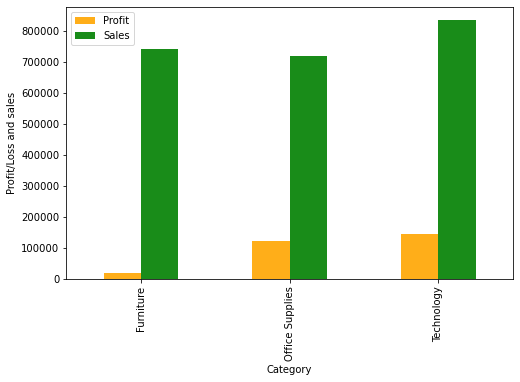

In [35]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['orange','green'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation 9
### As a business manager, try to find out the weak areas where you can work to make more profit?
#### Technology and Office Supplies have high profit.
#### Furniture have less profit

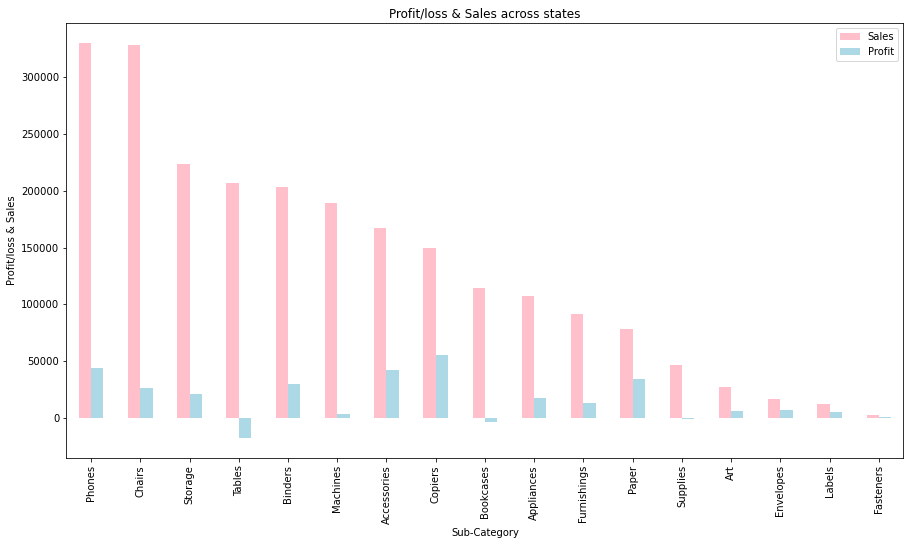

In [36]:
ps = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['pink','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Observation 10
Phones sub-category have high sales.
chairs have high sales but less profit compared to phones
Tables and Bookmarks sub-categories facing huge loss